In [ ]:
import # as yf
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from ta.trend import MACD, SMAIndicator, EMAIndicator
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA',
    'META', 'NVDA', 'JPM', 'JNJ', 'V',
    'AIR.PA', 'MC.PA', 'TTE.PA', 'SAN.PA', 'ASML.AS',
    'SIE.DE', 'HSBA.L', 'NESN.SW', 'BMW.DE', 'IBE.MC'
]

# Augmenter la période à 5 ans au lieu de 18 mois pour avoir plus de données
data = yf.download(tickers, period="5y", interval = '1d')
#data = tickers.history(period="5y")

print("Colonnes disponibles:")
print(data.columns.levels[0])

/var/folders/70/d34n36ks6x9brgknfgxy83y00000gp/T/ipykernel_61497/303090847.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="5y", interval = '1d')
[*********************100%***********************]  20 of 20 completed


Colonnes disponibles:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [63]:
data

Price            Close                                                 \
Ticker            AAPL      AIR.PA        AMZN     ASML.AS     BMW.DE   
Date                                                                    
2020-11-06  115.651054   65.407120  165.568497  324.201416  47.566936   
2020-11-09  113.341728   77.554153  157.186996  338.966095  50.596909   
2020-11-10  113.000702   82.151337  151.751007  325.587097  51.995945   
2020-11-11  116.430573   81.291702  156.869507  335.191284  52.624378   
2020-11-12  116.157730   79.058502  155.514008  337.245911  52.893711   
...                ...         ...         ...         ...        ...   
2025-10-30  271.399994  212.699997  222.860001  937.500000  81.379997   
2025-10-31  270.369995  213.399994  244.220001  918.099976  80.720001   
2025-11-03  269.049988  214.149994  254.000000  926.500000  81.540001   
2025-11-04  270.040009  212.850006  249.320007  918.000000  80.300003   
2025-11-06  270.859985  208.649994  242.850006  895.299988  84.300003   

Price                                                                   ...  \
Ticker           GOOGL       HSBA.L     IBE.MC         JNJ         JPM  ...   
Date                                                                    ...   
2020-11-06   87.383812   336.821503   8.855829  123.341019   90.427078  ...   
2020-11-09   87.467728   372.916687   8.924384  126.661896  102.670197  ...   
2020-11-10   86.290848   372.866882   8.920354  128.569443  102.336487  ...   
2020-11-11   86.763084   386.477325   9.158282  128.153275  100.808266  ...   
2020-11-12   86.544090   371.421021   9.230870  128.586823   99.569908  ...   
...                ...          ...        ...         ...         ...  ...   
2025-10-30  281.480011  1069.800049  17.559999  189.050003  309.440002  ...   
2025-10-31  281.190002  1063.400024  17.565001  188.869995  311.119995  ...   
2025-11-03  283.720001  1069.000000  17.535000  186.259995  309.350006  ...   
2025-11-04  277.540009  1075.000000  17.795000  186.860001  309.250000  ...   
2025-11-06  283.785004  1088.800049  17.770000  186.250000  311.790009  ...   

Price          Volume                                                   \
Ticker          MC.PA        META        MSFT     NESN.SW         NVDA   
Date                                                                     
2020-11-06   452199.0  13891000.0  25231900.0   4007513.0  383348000.0   
2020-11-09  1163330.0  25117700.0  44395000.0   9209793.0  582976000.0   
2020-11-10   926951.0  29067700.0  44045100.0  10349808.0  644068000.0   
2020-11-11   630882.0  14957000.0  29440800.0   6384693.0  404744000.0   
2020-11-12   602791.0  12899500.0  21593900.0   5444221.0  365812000.0   
...               ...         ...         ...         ...          ...   
2025-10-30   286364.0  88440100.0  41023100.0   3538466.0  178864400.0   
2025-10-31   367194.0  56953200.0  34006400.0   3657282.0  179802200.0   
2025-11-03   310321.0  33003600.0  22374700.0   2472827.0  180267300.0   
2025-11-04   291674.0  27356600.0  20958700.0   3366776.0  188919300.0   
2025-11-06   403130.0  10550084.0  10495192.0   1952045.0   98634172.0   

Price                                                                  
Ticker         SAN.PA     SIE.DE         TSLA      TTE.PA           V  
Date                                                                   
2020-11-06  2772632.0  1919822.0   65118000.0   7810270.0   6180500.0  
2020-11-09  4269162.0  5067031.0  104499000.0  25020128.0  17916900.0  
2020-11-10  3785013.0  3116139.0   90852600.0  19505706.0   7943600.0  
2020-11-11  2198272.0  1996993.0   52073100.0  10629689.0   5337200.0  
2020-11-12  2568203.0  2705730.0   59565300.0   7903490.0   7302500.0  
...               ...        ...          ...         ...         ...  
2025-10-30  1533772.0   740055.0   72447900.0   4472925.0   6411800.0  
2025-10-31  1377327.0   683439.0   83135800.0   3199896.0   7301600.0  
2025-11-03  1124261.0   700448.0   845952

In [69]:
data['Open'].isnull().sum()

Ticker
AAPL       37
AIR.PA     10
AMZN       37
ASML.AS    10
BMW.DE     17
GOOGL      37
HSBA.L     31
IBE.MC     12
JNJ        37
JPM        37
MC.PA      10
META       37
MSFT       37
NESN.SW    33
NVDA       37
SAN.PA     10
SIE.DE     17
TSLA       37
TTE.PA     10
V          37
dtype: int64

In [70]:
# Fonction pour calculer les indicateurs pour chaque ticker
def add_technical_indicators(df, ticker):
    """
    Ajoute les indicateurs techniques à un DataFrame pour un ticker donné
    """
    # Extraction des données de clôture pour le ticker
    close = df['Close'][ticker].dropna()
    high = df['High'][ticker].dropna()
    low = df['Low'][ticker].dropna()
    volume = df['Volume'][ticker].dropna()

    common_index = close.index.intersection(high.index).intersection(low.index).intersection(volume.index)

    close = close.loc[common_index]
    high = high.loc[common_index]
    low = low.loc[common_index]
    volume = volume.loc[common_index]
    # DataFrame pour stocker les indicateurs
    indicators = pd.DataFrame(index=close.index)

    # Prix de clôture
    indicators['Close'] = close

    # RSI (Relative Strength Index) - 14 jours par défaut
    rsi = RSIIndicator(close=close, window=14)
    indicators['RSI'] = rsi.rsi()

    # MACD (Moving Average Convergence Divergence)
    macd = MACD(close=close, window_slow=26, window_fast=12, window_sign=9)
    indicators['MACD'] = macd.macd()
    indicators['MACD_Signal'] = macd.macd_signal()
    indicators['MACD_Diff'] = macd.macd_diff()

    # Moving Averages
    indicators['SMA_20'] = SMAIndicator(close=close, window=20).sma_indicator()
    indicators['SMA_50'] = SMAIndicator(close=close, window=50).sma_indicator()
    indicators['EMA_12'] = EMAIndicator(close=close, window=12).ema_indicator()
    indicators['EMA_26'] = EMAIndicator(close=close, window=26).ema_indicator()

    # Bollinger Bands
    bollinger = BollingerBands(close=close, window=20, window_dev=2)
    indicators['BB_High'] = bollinger.bollinger_hband()
    indicators['BB_Low'] = bollinger.bollinger_lband()
    indicators['BB_Mid'] = bollinger.bollinger_mavg()

    # Indicateurs dérivés utiles pour LSTM
    indicators['Price_Change'] = close.pct_change(fill_method=None) # fill_method=None permet d'éviter les erreurs de warning
    indicators['Volume_Change'] = volume.pct_change(fill_method=None)

    # Distance du prix par rapport aux moyennes mobiles (normalisée) -- éviter division par zéro
    eps = 1e-8
    indicators['Distance_SMA20'] = (close - indicators['SMA_20']) / (indicators['SMA_20'] + eps)
    indicators['Distance_SMA50'] = (close - indicators['SMA_50']) / (indicators['SMA_50'] + eps)

    return indicators

In [71]:
# Calcul des indicateurs pour chaque ticker
all_indicators = {}
for ticker in tickers:
    print(f"Calcul des indicateurs pour {ticker}...")
    indicators = add_technical_indicators(data, ticker)
    all_indicators[ticker] = indicators

    # Afficher un aperçu
    print(f"\n{ticker} - Dernières valeurs:")
    print(indicators.tail())
    print("\n" + "="*50 + "\n")

# Exemple: accéder aux indicateurs d'AAPL
aapl_indicators = all_indicators['AAPL']
print("Indicateurs disponibles pour AAPL:")
print(aapl_indicators.columns.tolist())

Calcul des indicateurs pour AAPL...

AAPL - Dernières valeurs:
                 Close        RSI      MACD  MACD_Signal  MACD_Diff  \
Date                                                                  
2025-10-30  271.399994  71.085557  6.176673     5.058462   1.118211   
2025-10-31  270.369995  69.066813  6.298416     5.306453   0.991963   
2025-11-03  269.049988  66.461879  6.216722     5.488507   0.728216   
2025-11-04  270.040009  67.453364  6.160847     5.622975   0.537872   
2025-11-06  270.859985  68.289529  6.112273     5.720834   0.391438   

                SMA_20      SMA_50      EMA_12      EMA_26     BB_High  \
Date                                                                     
2025-10-30  257.891999  247.338999  263.108378  256.931705  273.595312   
2025-10-31  258.509499  248.248399  264.225550  257.927134  275.128934   
2025-11-03  259.127499  249.074199  264.967771  258.751049  276.339012   
2025-11-04  259.805499  249.931799  265.748115  259.587268  277.60471

In [72]:
# Configuration du style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def plot_stock_with_indicators(indicators, ticker, figsize=(15, 12)):
    """
    Crée une visualisation complète avec prix et tous les indicateurs techniques
    """
    fig, axes = plt.subplots(4, 1, figsize=figsize, sharex=True)
    fig.suptitle(f'Analyse Technique - {ticker}', fontsize=16, fontweight='bold')

    # 1. Prix et Moving Averages
    ax1 = axes[0]
    ax1.plot(indicators.index, indicators['Close'], label='Prix', linewidth=2, color='black')
    ax1.plot(indicators.index, indicators['SMA_20'], label='SMA 20', linewidth=1.5, alpha=0.7)
    ax1.plot(indicators.index, indicators['SMA_50'], label='SMA 50', linewidth=1.5, alpha=0.7)
    ax1.fill_between(indicators.index, indicators['BB_Low'], indicators['BB_High'],
                      alpha=0.2, label='Bollinger Bands')
    ax1.set_ylabel('Prix ($)', fontsize=11)
    ax1.set_title('Prix et Moyennes Mobiles', fontsize=12)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)

    # 2. Volume
    ax2 = axes[1]
    colors = ['green' if indicators['Price_Change'].iloc[i] >= 0 else 'red'
              for i in range(len(indicators))]
    ax2.bar(indicators.index, indicators.index.map(lambda x: 1), color=colors, alpha=0.3, width=0.8)
    ax2.set_ylabel('Volume (relatif)', fontsize=11)
    ax2.set_title('Volume de Trading', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # 3. MACD
    ax3 = axes[2]
    ax3.plot(indicators.index, indicators['MACD'], label='MACD', linewidth=1.5)
    ax3.plot(indicators.index, indicators['MACD_Signal'], label='Signal', linewidth=1.5)
    ax3.bar(indicators.index, indicators['MACD_Diff'], label='Histogramme',
            alpha=0.3, color='gray')
    ax3.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax3.set_ylabel('MACD', fontsize=11)
    ax3.set_title('MACD (Moving Average Convergence Divergence)', fontsize=12)
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)

    # 4. RSI
    ax4 = axes[3]
    ax4.plot(indicators.index, indicators['RSI'], linewidth=2, color='purple')
    ax4.axhline(y=70, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Surachat (70)')
    ax4.axhline(y=30, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Survente (30)')
    ax4.fill_between(indicators.index, 30, 70, alpha=0.1, color='gray')
    ax4.set_ylabel('RSI', fontsize=11)
    ax4.set_xlabel('Date', fontsize=11)
    ax4.set_title('RSI (Relative Strength Index)', fontsize=12)
    ax4.set_ylim(0, 100)
    ax4.legend(loc='best')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig

In [73]:
def plot_correlation_matrix(indicators, ticker, figsize=(12, 10)):
    """
    Matrice de corrélation entre les indicateurs
    """
    # Sélection des colonnes numériques pertinentes
    cols_to_correlate = ['Close', 'RSI', 'MACD', 'MACD_Signal',
                         'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26',
                         'Distance_SMA20', 'Distance_SMA50', 'Price_Change', 'BB_High', 'BB_Low', 'BB_Mid']

    # Filtrer les colonnes qui existent
    existing_cols = [col for col in cols_to_correlate if col in indicators.columns]

    corr_data = indicators[existing_cols].corr()

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                ax=ax)
    ax.set_title(f'Matrice de Corrélation des Indicateurs - {ticker}',
                 fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    return fig

In [74]:
def plot_multiple_tickers_comparison(all_indicators, tickers_to_plot, metric='RSI', figsize=(15, 8)):
    """
    Compare un indicateur spécifique pour plusieurs tickers
    """
    fig, ax = plt.subplots(figsize=figsize)

    for ticker in tickers_to_plot:
        if ticker in all_indicators:
            indicators = all_indicators[ticker]
            ax.plot(indicators.index, indicators[metric],
                   label=ticker, linewidth=1.5, alpha=0.8)

    if metric == 'RSI':
        ax.axhline(y=70, color='red', linestyle='--', linewidth=1, alpha=0.5)
        ax.axhline(y=30, color='green', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_ylim(0, 100)

    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'Comparaison {metric} - Multiples Actions', fontsize=14, fontweight='bold')
    ax.legend(loc='best', ncol=2)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig


In [75]:
def plot_price_normalized_comparison(all_indicators, tickers_to_plot, figsize=(15, 8)):
    """
    Compare l'évolution normalisée des prix (base 100)
    """
    fig, ax = plt.subplots(figsize=figsize)

    for ticker in tickers_to_plot:
        if ticker in all_indicators:
            indicators = all_indicators[ticker]
            # Normalisation à 100 au départ
            normalized_price = (indicators['Close'] / indicators['Close'].iloc[0]) * 100
            ax.plot(indicators.index, normalized_price,
                   label=ticker, linewidth=2, alpha=0.8)

    ax.axhline(y=100, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Prix Normalisé (Base 100)', fontsize=12)
    ax.set_title('Performance Relative des Actions', fontsize=14, fontweight='bold')
    ax.legend(loc='best', ncol=2)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig

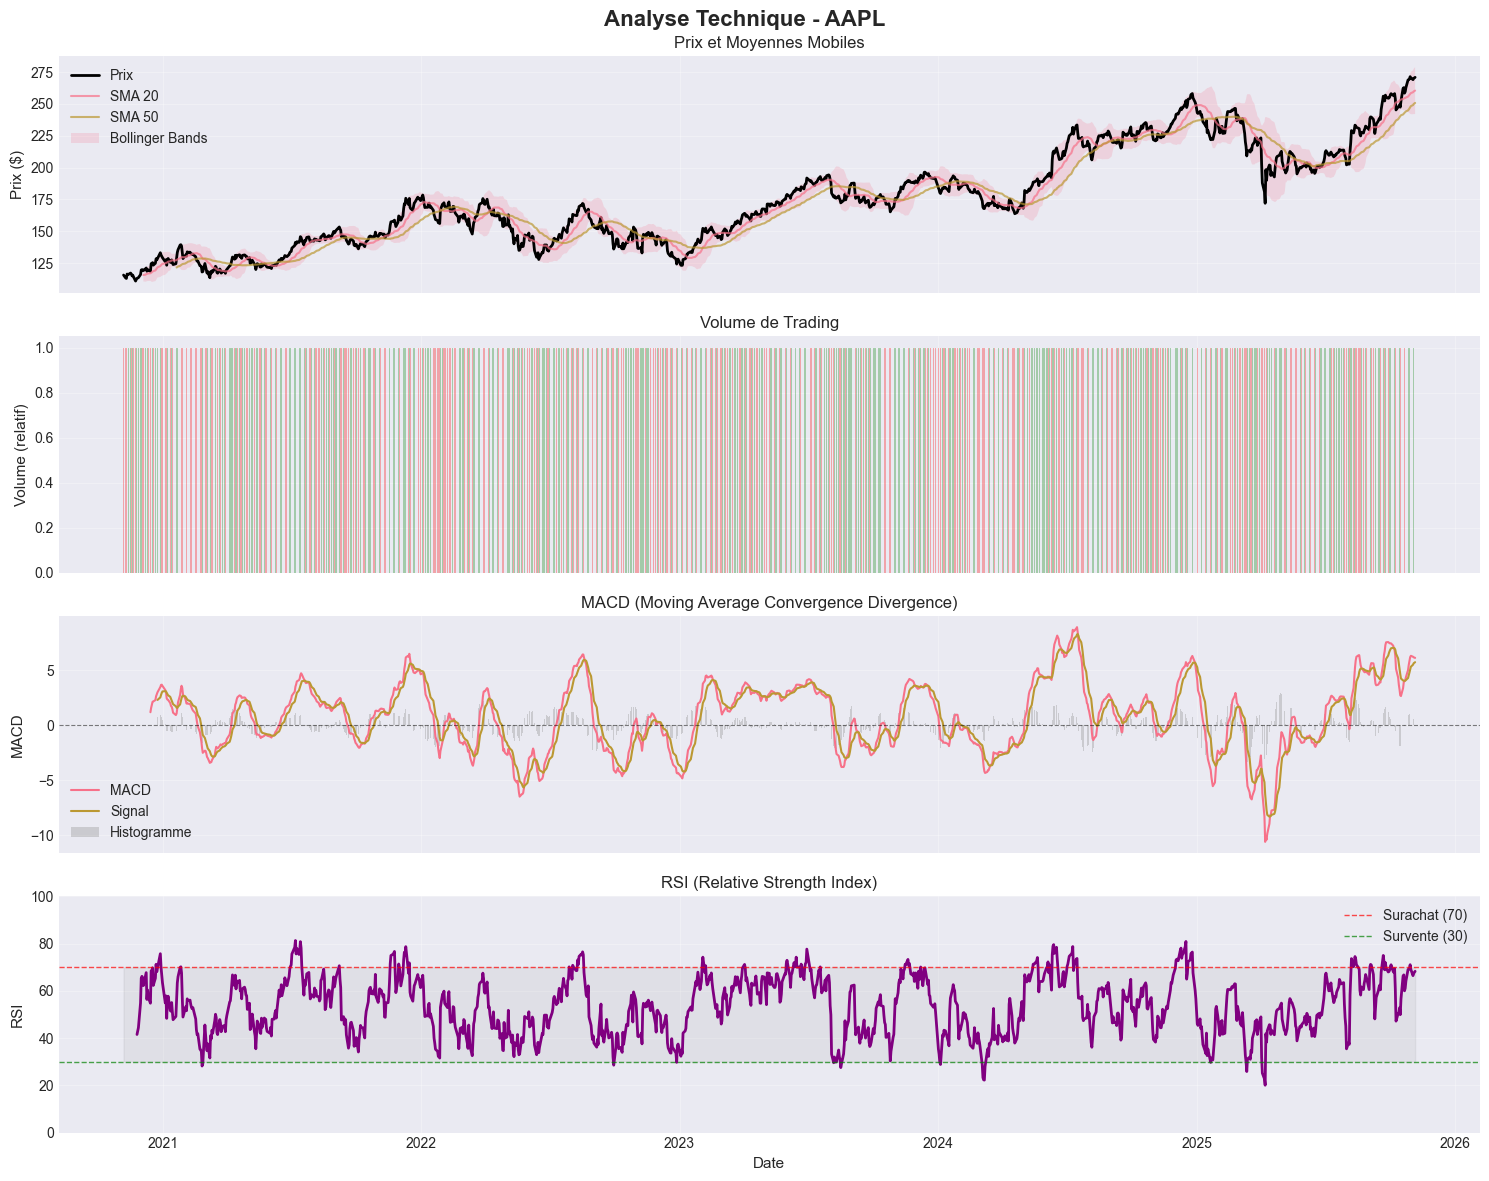

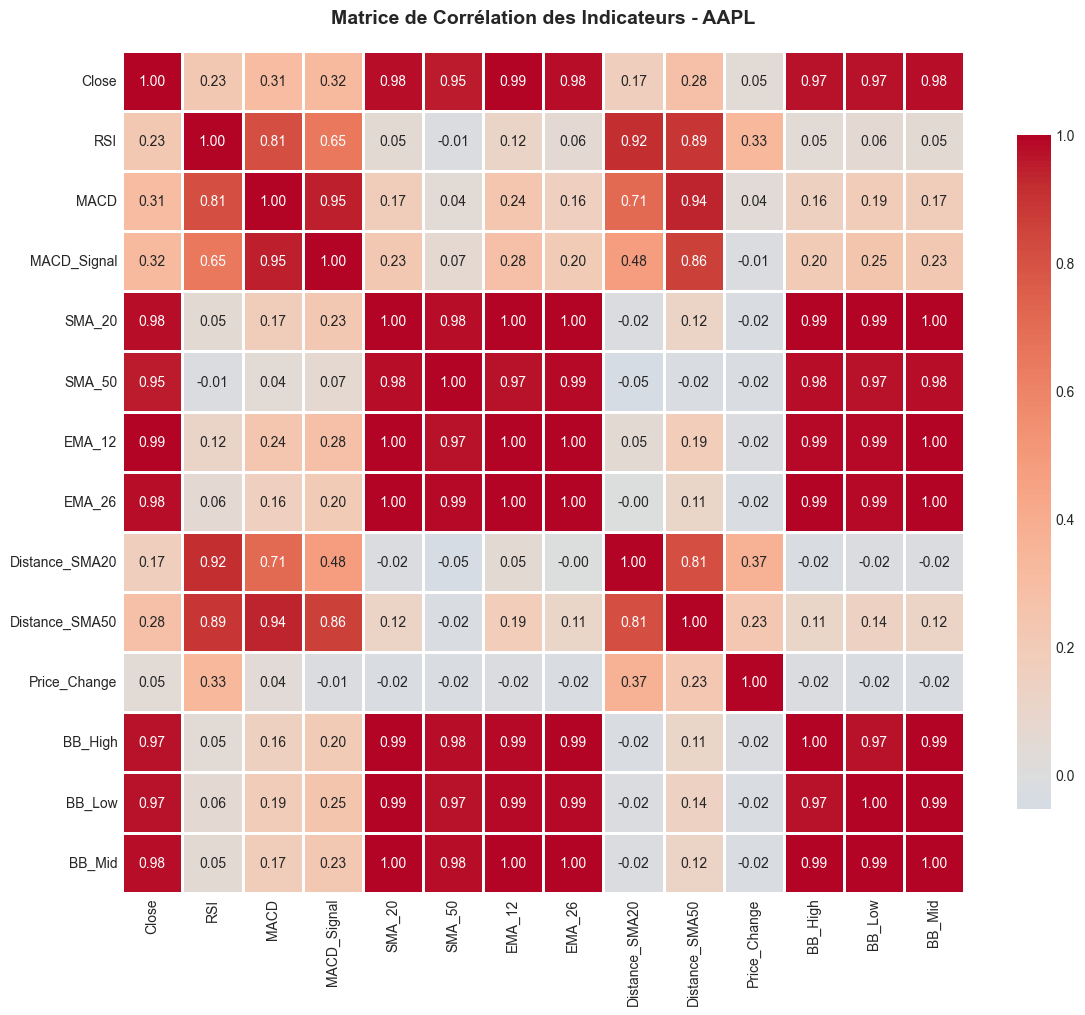

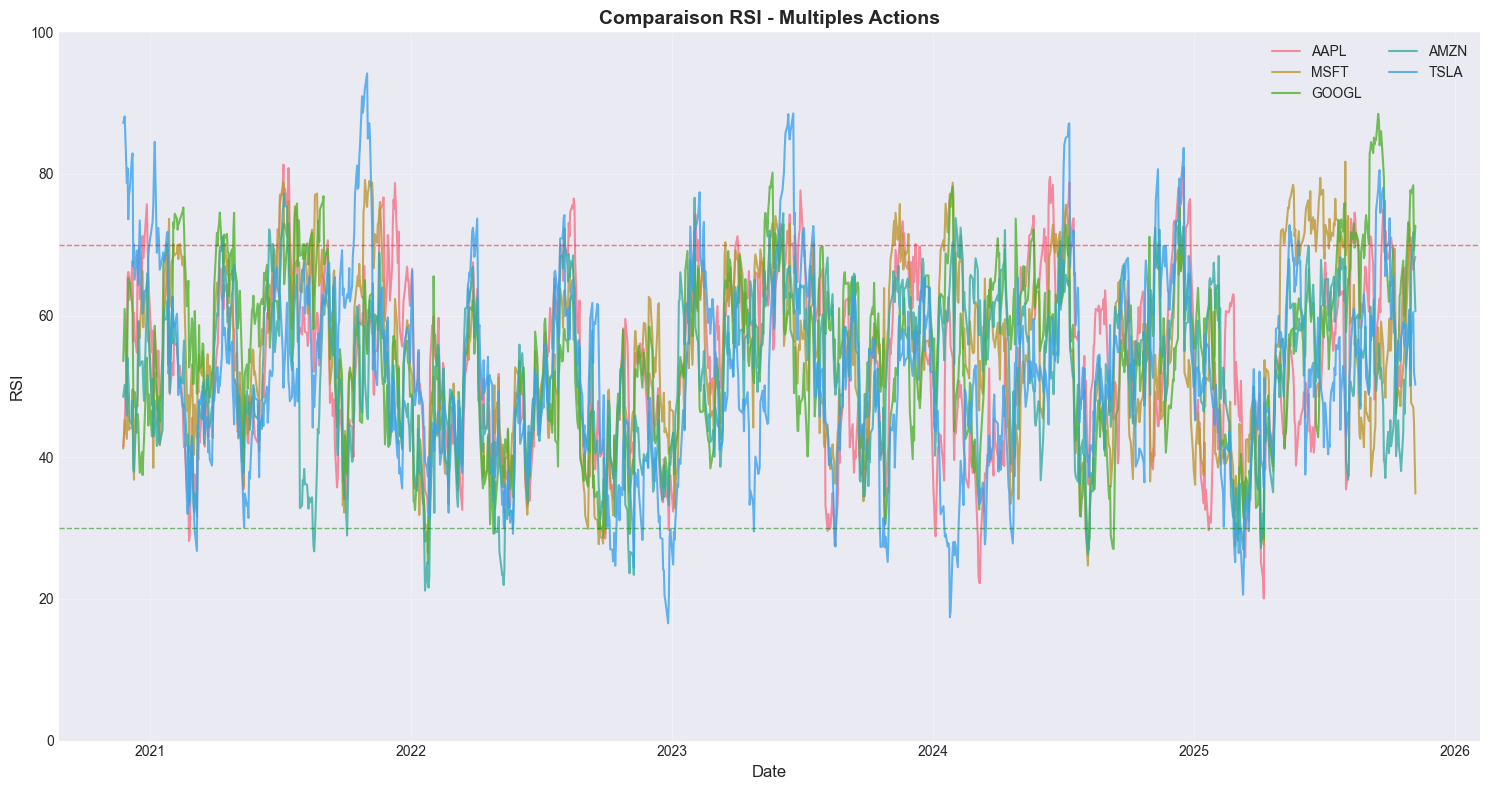

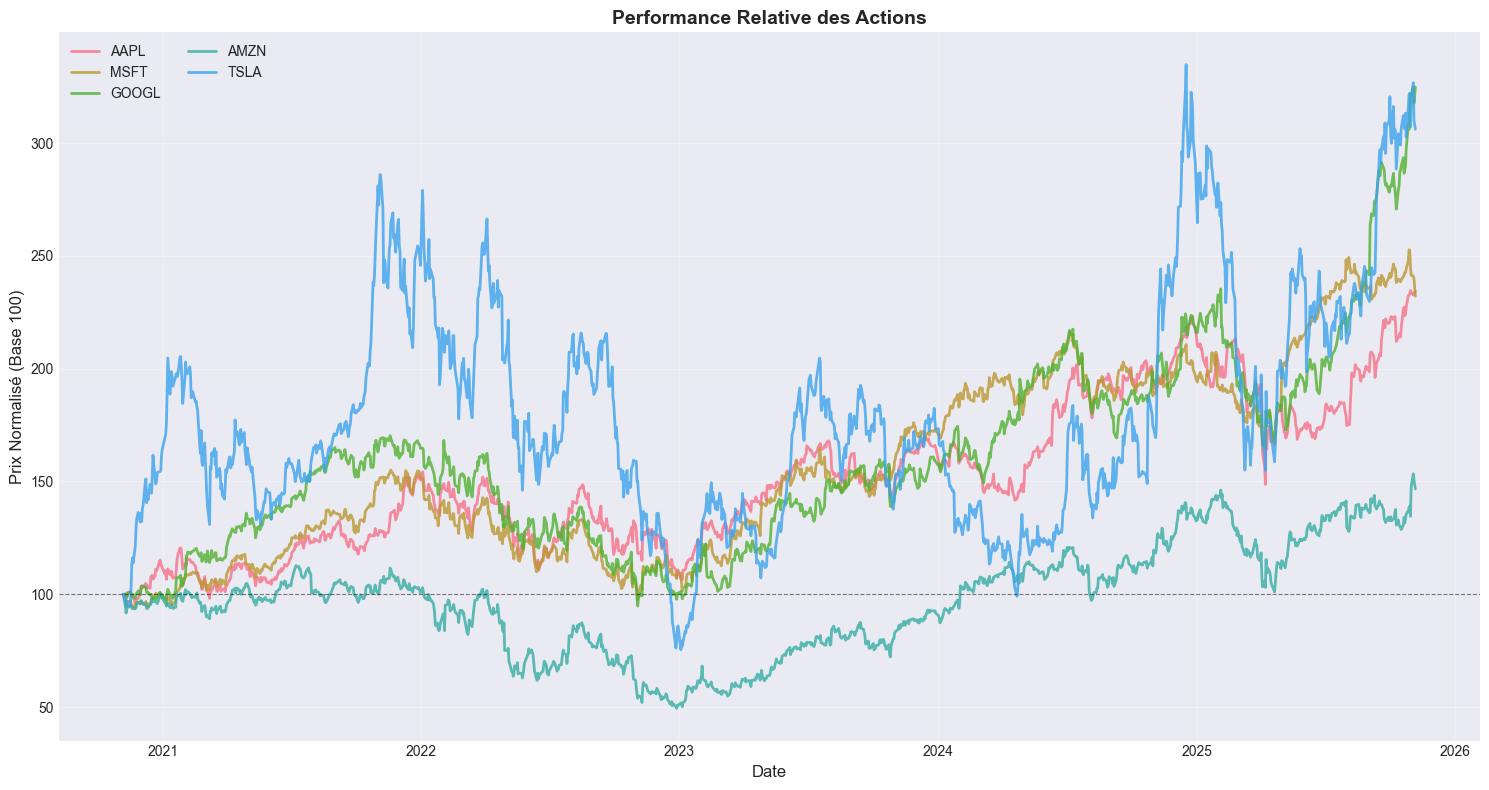

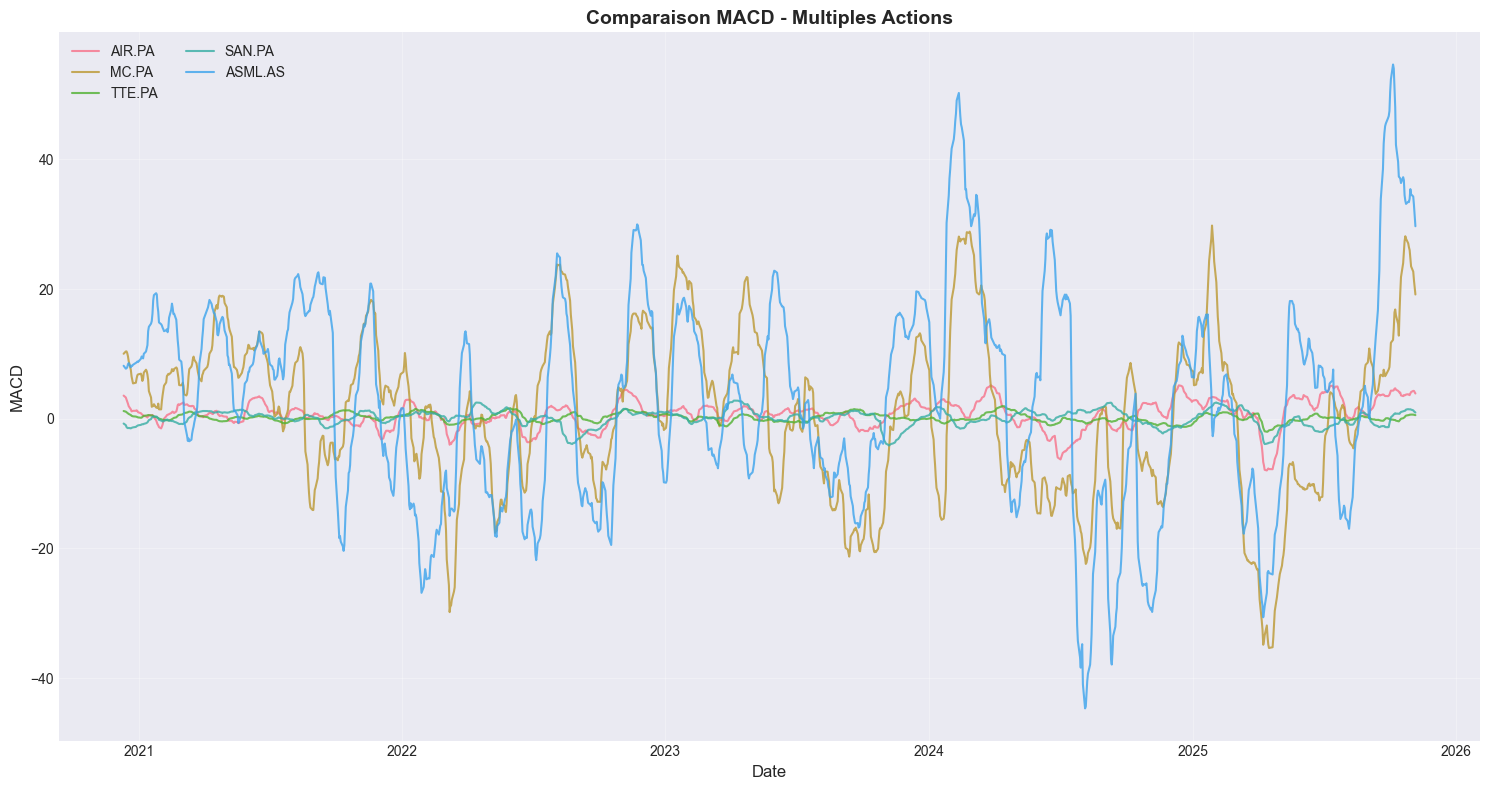

In [76]:
# Pour un ticker spécifique
ticker_example = 'AAPL'
if ticker_example in all_indicators:
    fig1 = plot_stock_with_indicators(all_indicators[ticker_example], ticker_example)
    plt.show()

    fig2 = plot_correlation_matrix(all_indicators[ticker_example], ticker_example)
    plt.show()

# Comparaison de plusieurs tickers
tickers_us = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
fig3 = plot_multiple_tickers_comparison(all_indicators, tickers_us, metric='RSI')
plt.show()

fig4 = plot_price_normalized_comparison(all_indicators, tickers_us)
plt.show()

# Comparaison des actions européennes
tickers_eu = ['AIR.PA', 'MC.PA', 'TTE.PA', 'SAN.PA', 'ASML.AS']
fig5 = plot_multiple_tickers_comparison(all_indicators, tickers_eu, metric='MACD')
plt.show()


In [77]:
# Nettoyage des données manquantes

def clean_indicators(indicators_dict):
    """
    Nettoie les données en supprimant les NaN
    """
    cleaned_indicators = {}

    for ticker, df in indicators_dict.items():
        # Supprimer les lignes avec NaN
        # Les premiers jours ont des NaN à cause des indicateurs (ex: SMA_50 a besoin de 50 jours)
        df_clean = df.dropna()
        cleaned_indicators[ticker] = df_clean

    return cleaned_indicators

# Nettoyer toutes les données
cleaned_data = clean_indicators(all_indicators)

In [78]:
test_data = cleaned_data['AAPL']
test_data

,Close,RSI,MACD,MACD_Signal,MACD_Diff,SMA_20,SMA_50,EMA_12,EMA_26,BB_High,BB_Low,BB_Mid,Price_Change,Volume_Change,Distance_SMA20,Distance_SMA50
Date,,,,,,,,,,,,,,,,
2021-01-20,128.649490,56.685320,1.061383,1.579308,-0.517925,127.430533,121.571294,126.377907,125.316524,132.366944,122.494123,127.430533,0.032856,0.149434,0.009566,0.058223
2021-01-21,133.365570,63.395529,1.540182,1.571483,-0.031301,127.851472,121.925585,127.452932,125.912750,133.280148,122.422797,127.851472,0.036658,0.151759,0.043129,0.093828
2021-01-22,135.509262,65.975743,2.068765,1.670939,0.397826,128.201768,122.368935,128.692367,126.623602,134.575389,121.828146,128.201768,0.016074,-0.047370,0.057000,0.107383
2021-01-25,139.260666,69.965593,2.758578,1.888467,0.870111,128.784457,122.894135,130.318259,127.559681,136.762803,120.806110,128.784457,0.027684,0.377010,0.081347,0.133176
2021-01-26,139.494507,70.200174,3.286247,2.168023,1.118224,129.329631,123.355413,131.729990,128.443742,138.570773,120.088489,129.329631,0.001679,-0.375741,0.078597,0.130834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-30,271.399994,71.085557,6.176673,5.058462,1.118211,257.891999,247.338999,263.108378,256.931705,273.595312,242.188686,257.891999,0.006303,0.367998,0.052378,0.097279
2025-10-31,270.369995,69.066813,6.298416,5.306453,0.991963,258.509499,248.248399,264.225550,257.927134,275.128934,241.890065,258.509499,-0.003795,0.232958,0.045880,0.089111
2025-11-03,269.049988,66.461879,6.216722,5.488507,0.728216,259.127499,249.074199,264.967771,258.751049,276.339012,241.915986,259.127499,-0.004882,-0.417474,0.038292,0.080200


In [79]:
def create_multi_horizon_labels(df, horizons=[1, 5, 30]):
    """
    Crée les labels pour la prédiction multi-horizons.
    Ne supprime que les lignes où TOUS les horizons sont NaN.
    """
    df_labeled = df.copy()

    # Créer les colonnes target pour chaque horizon
    for h in horizons:
        # Prix futur (valeur brute)
        df_labeled[f'Target_Price_{h}d'] = df_labeled['Close'].shift(-h)

        # Variation en pourcentage
        df_labeled[f'Target_Return_{h}d'] = (
            (df_labeled['Close'].shift(-h) - df_labeled['Close']) / df_labeled['Close'] * 100
        )

    # Ne garder que les lignes qui ont au moins un horizon valide
    target_cols = [f'Target_Return_{h}d' for h in horizons]
    df_labeled = df_labeled.dropna(subset=target_cols, how='all')

    # Afficher des statistiques
    print(f"  Statistiques des targets:")
    for col in target_cols:
        n_valid = df_labeled[col].notna().sum()
        print(f"    {col}: {n_valid} valeurs valides")

    return df_labeled

In [80]:
def normalize_data(df, method='minmax'):
    """
    Normalise les features (pas les targets!).
    Cette version :
      - ne prend que les colonnes numériques
      - remplace inf par la médiane de la colonne
      - impute les NaN avec forward fill puis backward fill
      - lève une erreur informative si aucun feature valide
    """
    df_normalized = df.copy()

    # Colonnes candidates (exclure les targets)
    candidate_cols = [col for col in df.columns if not str(col).startswith('Target_')]
    # Garder seulement les colonnes numériques
    numeric_feature_cols = df[candidate_cols].select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_feature_cols) == 0:
        raise ValueError('Aucune colonne numérique trouvée pour la normalisation (vérifie candidate_cols).')

    # Créer une copie des colonnes numériques
    df_feats = df[numeric_feature_cols].copy()

    # 1. Remplacer les inf/-inf par NaN
    df_feats = df_feats.replace([np.inf, -np.inf], np.nan)

    # 2. Pour chaque colonne, remplacer les NaN par la médiane
    for col in df_feats.columns:
        median = df_feats[col].median()
        df_feats[col] = df_feats[col].fillna(median)

    if df_feats.isna().any().any():
        # Si encore des NaN, utiliser forward fill puis backward fill
        df_feats = df_feats.fillna(method='ffill').fillna(method='bfill')

    if method == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()

    # Appliquer le scaling sur toutes les lignes
    scaled = scaler.fit_transform(df_feats.astype(float))
    df_normalized.loc[:, numeric_feature_cols] = scaled

    return df_normalized, scaler

In [81]:
labeled_data = {}
normalized_data = {}
scalers = {}

for ticker, df in cleaned_data.items():
    print(f"\n{ticker}:")
    print(f"  Taille initiale: {len(df)}")

    # 1. Créer les labels
    df_labeled = create_multi_horizon_labels(df, horizons=[1, 5, 30])
    print(f"  Après labeling: {len(df_labeled)}")
    labeled_data[ticker] = df_labeled

    # 2. Normaliser
    df_normalized, scaler = normalize_data(df_labeled, method='minmax')
    print(f"  Après normalisation: {len(df_normalized)}")
    # Vérifier les NaN
    n_nan = df_normalized.isna().sum().sum()
    print(f"  Nombre total de NaN après normalisation: {n_nan}")

    normalized_data[ticker] = df_normalized
    scalers[ticker] = scaler



AAPL:
  Taille initiale: 1206
  Statistiques des targets:
    Target_Return_1d: 1205 valeurs valides
    Target_Return_5d: 1201 valeurs valides
    Target_Return_30d: 1176 valeurs valides
  Après labeling: 1205
  Après normalisation: 1205
  Nombre total de NaN après normalisation: 66

MSFT:
  Taille initiale: 1206
  Statistiques des targets:
    Target_Return_1d: 1205 valeurs valides
    Target_Return_5d: 1201 valeurs valides
    Target_Return_30d: 1176 valeurs valides
  Après labeling: 1205
  Après normalisation: 1205
  Nombre total de NaN après normalisation: 66

GOOGL:
  Taille initiale: 1206
  Statistiques des targets:
    Target_Return_1d: 1205 valeurs valides
    Target_Return_5d: 1201 valeurs valides
    Target_Return_30d: 1176 valeurs valides
  Après labeling: 1205
  Après normalisation: 1205
  Nombre total de NaN après normalisation: 66

AMZN:
  Taille initiale: 1206
  Statistiques des targets:
    Target_Return_1d: 1205 valeurs valides
    Target_Return_5d: 1201 valeurs vali

In [82]:
def create_sequences(df, window_size=60, horizons=[1, 5, 30]):
    """
    Crée des séquences temporelles pour le LSTM
    Version plus flexible :
    - Adapte window_size si pas assez de données
    - Gère les NaN dans les targets
    - Validation plus souple des séquences
    """
    print(f" Shape initial du DataFrame: {df.shape}")

    # Colonnes cibles
    target_cols = [f'Target_Return_{h}d' for h in horizons]
    target_cols = [col for col in target_cols if col in df.columns]

    if not target_cols:
        raise ValueError("Aucune colonne target trouvée dans le DataFrame")

    # Features (toutes les colonnes sauf les targets)
    feature_cols = [col for col in df.columns if col not in target_cols]
    print(f" Nombre de features: {len(feature_cols)}")
    print(f" Nombre de targets: {len(target_cols)}")

    if not feature_cols:
        raise ValueError("Aucune colonne feature trouvée dans le DataFrame")

    # Adapter window_size si nécessaire
    n_samples = len(df)
    min_window = 5  # taille minimum de fenêtre
    if n_samples < window_size:
        original_window = window_size
        # Utiliser 20% des données comme taille de fenêtre, minimum 5
        window_size = max(min_window, min(window_size, n_samples // 5))
        print(f"  Attention: window_size réduit de {original_window} à {window_size} (adaptation aux données disponibles)")

    # Préparation des données
    features = df[feature_cols].values
    targets = df[target_cols].values

    # Création des séquences
    n_sequences = len(df) - window_size
    print(f"  Nombre potentiel de séquences: {n_sequences}")

    if n_sequences <= 0:
        print("  Pas assez de données pour créer des séquences")
        return np.array([]), np.array([]), feature_cols, target_cols

    X = []
    y = []

    for i in range(n_sequences):
        seq_features = features[i:i+window_size]
        seq_target = targets[i+window_size-1]  # target de la dernière timestep

        # Une séquence est valide si elle a moins de 20% de NaN
        if (np.isnan(seq_features).sum() / seq_features.size < 0.2 and
            not np.isnan(seq_target).any()):
            X.append(seq_features)
            y.append(seq_target)

    if len(X) > 0:
        X = np.array(X)
        y = np.array(y)
        print(f"  Séquences finales:")
        print(f"    X shape: {X.shape}, y shape: {y.shape}")
        print(f"    Window size utilisé: {window_size}")
    else:
        X = np.array([])
        y = np.array([])
        print("  Aucune séquence valide créée")

    return X, y, feature_cols, target_cols

In [83]:
def prepare_train_test_split(X, y, test_size=0.2, val_size=0.1):
    n_samples = len(X)
    test_idx = int(n_samples * (1 - test_size))
    val_idx = int(test_idx * (1 - val_size))

    X_train, y_train = X[:val_idx], y[:val_idx]
    X_val, y_val = X[val_idx:test_idx], y[val_idx:test_idx]
    X_test, y_test = X[test_idx:], y[test_idx:]

    print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

    return X_train, X_val, X_test, y_train, y_val, y_test

In [84]:
window_size = 30
horizons = [1, 5, 30]

In [85]:
sequences_data = {}

print("Création des séquences...")

min_sequences = 10  # réduit de 30 à 10 pour être encore plus permissif

for ticker, df in normalized_data.items():
    print(f"\n{ticker}")

    try:
        X, y, feature_cols, target_cols = create_sequences(df, window_size, horizons)

        if len(X) < min_sequences:
            print(f" Ignoré ({len(X)} séquences, minimum requis: {min_sequences})")
            continue

        X_train, X_val, X_test, y_train, y_val, y_test = prepare_train_test_split(X, y)

        sequences_data[ticker] = {
            'X_train': X_train, 'X_val': X_val, 'X_test': X_test,
            'y_train': y_train, 'y_val': y_val, 'y_test': y_test,
            'feature_cols': feature_cols, 'target_cols': target_cols,
            'window_size': window_size, 'scaler': scalers[ticker]
        }

        print(f" Prêt !")

    except Exception as e:
        print(f" Erreur: {e}")
        continue

print(f"\nTerminé - {len(sequences_data)} tickers prêts")

Création des séquences...

AAPL
 Shape initial du DataFrame: (1205, 22)
 Nombre de features: 19
 Nombre de targets: 3
  Nombre potentiel de séquences: 1175
  Séquences finales:
    X shape: (1147, 30, 19), y shape: (1147, 3)
    Window size utilisé: 30
Train: 825, Val: 92, Test: 230
 Prêt !

MSFT
 Shape initial du DataFrame: (1205, 22)
 Nombre de features: 19
 Nombre de targets: 3
  Nombre potentiel de séquences: 1175
  Séquences finales:
    X shape: (1147, 30, 19), y shape: (1147, 3)
    Window size utilisé: 30
Train: 825, Val: 92, Test: 230
 Prêt !

GOOGL
 Shape initial du DataFrame: (1205, 22)
 Nombre de features: 19
 Nombre de targets: 3
  Nombre potentiel de séquences: 1175
  Séquences finales:
    X shape: (1147, 30, 19), y shape: (1147, 3)
    Window size utilisé: 30
Train: 825, Val: 92, Test: 230
 Prêt !

AMZN
 Shape initial du DataFrame: (1205, 22)
 Nombre de features: 19
 Nombre de targets: 3
  Nombre potentiel de séquences: 1175
  Séquences finales:
    X shape: (1147, 30, 